In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import torchvision.transforms as transforms
import pickle as p
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

plt.style.use(['dark_background'])


In [2]:
os.listdir()

['Untitled.ipynb', '.ipynb_checkpoints', 'lfw-deepfunneled']

In [6]:
os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/ds2/lfw-deepfunneled/lfw-deepfunneled")

In [7]:
pwd

"/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/ds2/lfw-deepfunneled/lfw-deepfunneled"

In [9]:
lis = os.listdir()

out="/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/ds2/lfw-deepfunneled/lfw-deepfunneled"
folder = "/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/ds2/lfw-deepfunneled/lfw-deepfunneled/new"

for i in lis:
    os.chdir(out+'/'+i)
    l = os.listdir()
    for x in l:
        try:
            img = cv2.imread(x)
            os.chdir(folder)
            cv2.imwrite(x, img)
        except:
            pass

In [15]:
pwd

"/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/ds2/lfw-deepfunneled/lfw-deepfunneled/new"

In [17]:
os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model")

In [48]:
os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model")
lis = os.listdir()
for i in lis:
    if i in ['ds','new','processed','Untitled.ipynb']:
        lis.remove(i)


for ind, i in enumerate(lis):
    os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model")
    img = cv2.imread(i)
    os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/processed")
    img=cv2.resize(img, (360,360), interpolation=cv2.INTER_AREA)
    cv2.imwrite(str(ind)+'.jpg', img) 
    
#    try:
 #       img=cv2.resize(img, (360,360), interpolation=cv2.INTER_AREA)
  #      cv2.imwrite(ind+'.jpg', img)                     
   # except:
    #    print(i)

In [50]:
os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/processed")

In [57]:
labels = [1 for i in range(228)]

In [67]:
os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/new")
new = os.listdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/new")
random.shuffle(new)
ind=228


for i in new[250: 487]:
    ind+=1
    os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/new")
    img = cv2.imread(i)
    
    os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/processed")
    img=cv2.resize(img, (360,360), interpolation=cv2.INTER_AREA)
    cv2.imwrite(str(ind)+'.jpg', img) 

In [65]:
len(new)

5749

In [68]:
os.chdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/processed")

In [78]:
al = os.listdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/processed")
labels=np.zeros(len(al))
cnvrt = transforms.ToTensor()
dataset1=[]

for ind, i in enumerate(al):
    img = cv2.imread(i)
    if ind<228:
        labels[ind]=1
        dataset1.append((cnvrt(img), int(1)))
    else:
        dataset1.append((cnvrt(img), int(0)))
        

In [95]:
import pickle as p

directory="/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model"
os.chdir(directory)

p_out = open('dataset1.pickle', 'wb')
p.dump(dataset1, p_out)
p_out.close()

In [96]:
directory="/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model"
os.chdir(directory)

p_in = open('dataset1.pickle', 'rb')
dataset1 = p.load(p_in)

In [27]:
directory="/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/processed"
os.chdir(directory)
al = os.listdir("/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model/processed")
labels1=np.zeros(len(al))
cnvrt = transforms.ToTensor()
dataset2=[]

for ind, i in enumerate(al):
    img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    nam=int(i[:-4])
    if nam<228:
        labels1[ind]=1
        dataset2.append((cnvrt(img), int(1)))
    else:
        dataset2.append((cnvrt(img), int(0)))

In [94]:
import pickle as p

directory="/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model"
os.chdir(directory)

p_out = open('dataset2.pickle', 'wb')
p.dump(dataset2, p_out)
p_out.close()

In [2]:
directory="/home/ishaq/Documents/books/IBM's/IBM_computer-vision/model"
os.chdir(directory)

p_in = open('dataset2.pickle', 'rb')
dataset2 = p.load(p_in)

In [3]:
# Define the function for plotting the parameters

def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:,0,:]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(number_rows, n_filters // number_rows, figsize=(18,9))
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_filters:
            # Set the label for the sub-plot.
            ax.set_xlabel("kernel:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(W[i], cmap='gray')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.suptitle(name, fontsize=10)    
    plt.show()

In [4]:
Model.state_dict()['cnn2.weight'][:,0,:][0]

NameError: name 'Model' is not defined

In [5]:
# Define the function for plotting the channels

def plot_channels(W):
    n_out = W.shape[0]
    n_in = W.shape[1]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(8, 8, figsize=(18,9))
    fig.subplots_adjust(hspace=0.1)
    out_index = 0
    in_index = 0
    
    #plot outputs as rows inputs as columns 
    for ax in axes.flat:
        if in_index > n_in-1:
            out_index = out_index + 1
            in_index = 0
        ax.imshow(W[out_index, in_index], cmap='gray')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index = in_index + 1

    plt.show()

In [46]:
# Define the function for plotting the activations

def plot_activations(A, number_rows=1, name="", i=0):
    A = A[0, :, :, :].detach().numpy()
    n_activations = A.shape[0]
    A_min = A.min().item()
    A_max = A.max().item()
    fig, axes = plt.subplots(number_rows, n_activations // number_rows, figsize=(18,9))
    fig.subplots_adjust(hspace = 0.9)    

    for i, ax in enumerate(axes.flat):
        if i < n_activations:
            # Set the label for the sub-plot.
            ax.set_xlabel("activation:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(A[i, :], cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [23]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(360, 360), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [7]:
class CNN(nn.Module):
    
    def __init__(self, out1=16, out2=32):
        super(CNN, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2=nn.Conv2d(in_channels=out1, out_channels=out2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        self.fc1=nn.Linear(out2 * 90 * 90, 10)
        
    def forward(self,x):
        x=self.cnn1(x)
        x=torch.relu(x)
        x=self.maxpool1(x)
        
        x=self.cnn2(x)
        x=torch.relu(x)
        x=self.maxpool2(x)
        
        x=x.view(x.size(0), -1)
        x=self.fc1(x)
        
        return x
    
    def activation(self, x):
        z1=self.cnn1(x)
        a1=torch.relu(z1)
        out=self.maxpool1(a1)
        
        z2=self.cnn2(out)
        a2=torch.relu(z2)
        out_1=self.maxpool2(a2)
        out=out.view(out.size(0), -1)
        
        return z1, a1, z2, a2, out_1, out

In [8]:
Model = CNN(16, 32)

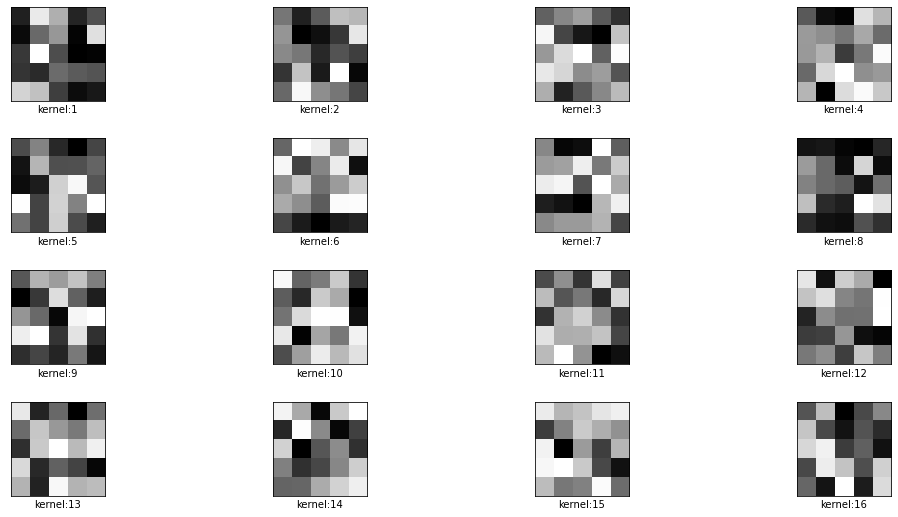

In [9]:
plot_parameters(Model.state_dict()['cnn1.weight'], number_rows=4)

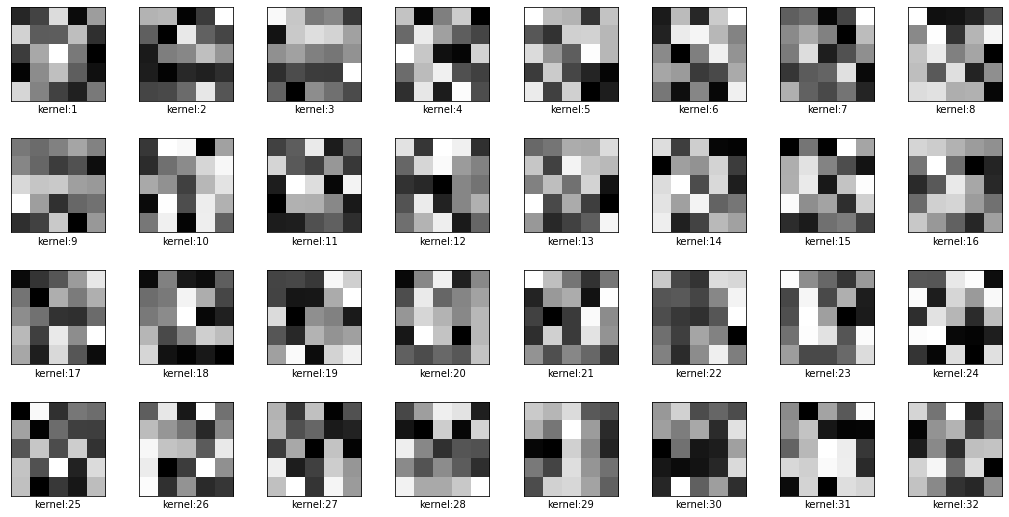

In [10]:
plot_parameters(Model.state_dict()['cnn2.weight'], number_rows=4)

In [ ]:
p_in = open('train1_dataset1.pickle', 'rb')
train_dataset = p.load(p_in)


In [78]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.1

optmizer = torch.optim.SGD(Model.parameters(), lr=learning_rate)

train_loader = torch.utils.data.DataLoader(dataset=dataset2, batch_size=50)
validation_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1)

In [79]:
epochs = 10
N_test=len(train_dataset)
accuracy_list=[]
cost_list=[]
accuracy_list=[]

def train_model(epochs):
    
    for epoch in range(epochs):
        
        COST=0
        
        for x,y in train_loader:
            
            optmizer.zero_grad()
            
            z=Model(x)
            
            loss=criterion(z,y)
            
            loss.backward()
            
            optmizer.step()
            
            COST+=loss.data
            
        cost_list.append(COST)
        print(epoch)
        
        correct=0
        for x_test, y_test in validation_loader:
    
            z = Model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        
        accuracy = correct / N_test
        accuracy_list.append(accuracy)

In [80]:
train_model(epochs)

0
1
2
3
4
5
6
7
8
9


In [81]:
torch.save(Model, 'Model2.pt')

In [ ]:
model = torch.load('model.pt')
model.eval()

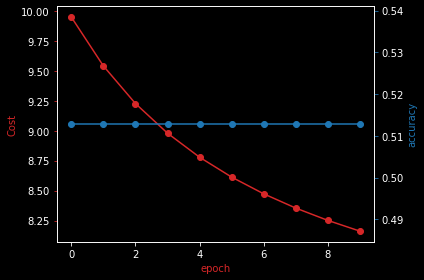

In [82]:
# Plot the Loss and Accuracy vs Epoch graph

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color, marker='o')
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color, marker='o')
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [83]:
accuracy_list

[0.5128205128205128,
 0.5128205128205128,
 0.5128205128205128,
 0.5128205128205128,
 0.5128205128205128,
 0.5128205128205128,
 0.5128205128205128,
 0.5128205128205128,
 0.5128205128205128,
 0.5128205128205128]

In [84]:
cost_list

[tensor(9.9490),
 tensor(9.5409),
 tensor(9.2273),
 tensor(8.9796),
 tensor(8.7790),
 tensor(8.6130),
 tensor(8.4734),
 tensor(8.3542),
 tensor(8.2514),
 tensor(8.1618)]

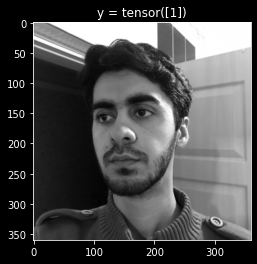

yhat:  tensor([0])


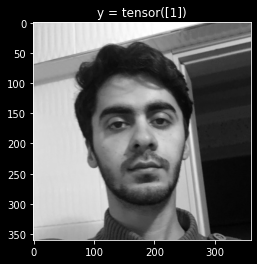

yhat:  tensor([0])


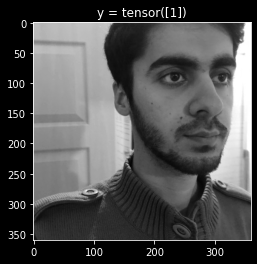

yhat:  tensor([0])


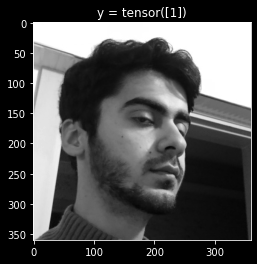

yhat:  tensor([0])


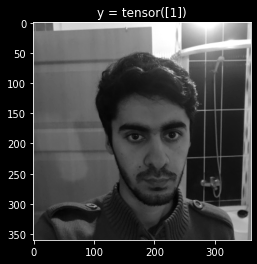

yhat:  tensor([0])


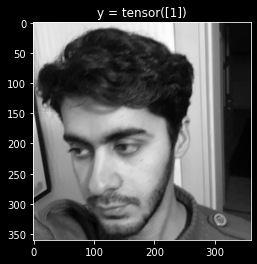

yhat:  tensor([0])


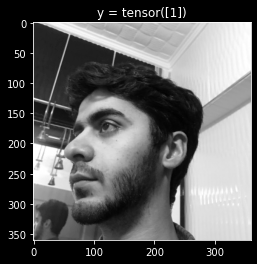

yhat:  tensor([0])


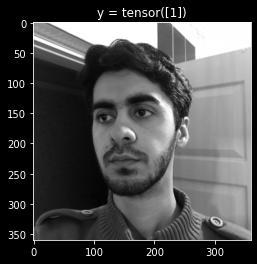

yhat:  tensor([0])


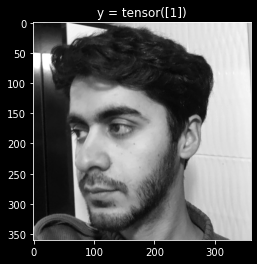

yhat:  tensor([0])


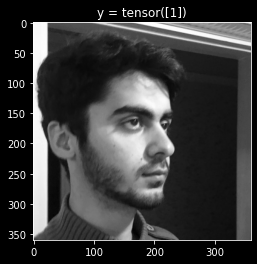

yhat:  tensor([0])


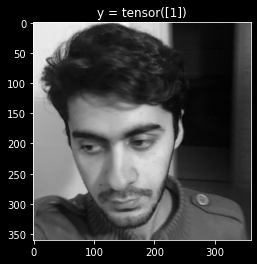

yhat:  tensor([0])


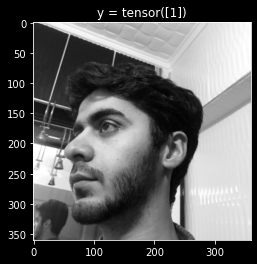

yhat:  tensor([0])


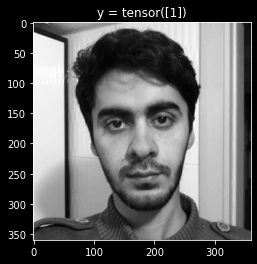

yhat:  tensor([0])


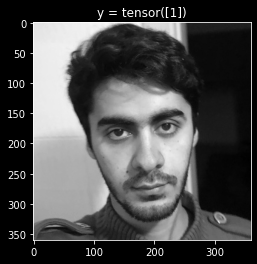

yhat:  tensor([0])


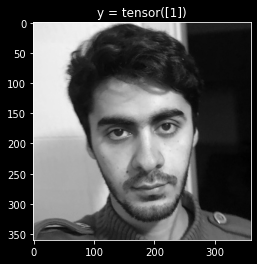

yhat:  tensor([0])


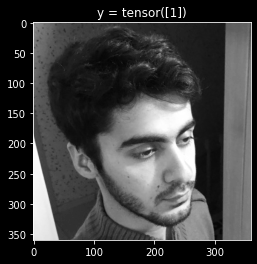

yhat:  tensor([0])


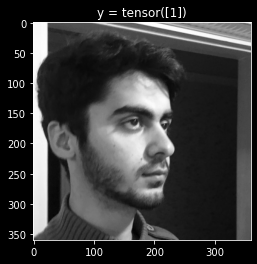

yhat:  tensor([0])


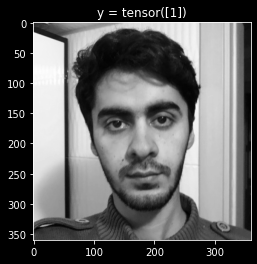

yhat:  tensor([0])


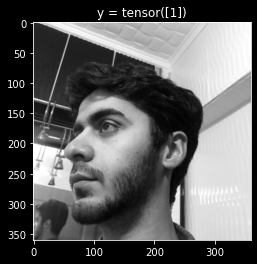

yhat:  tensor([0])


In [89]:
# Plot the misclassified samples

count = 0
for x, y in torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1):
    z = Model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 25:
        break  

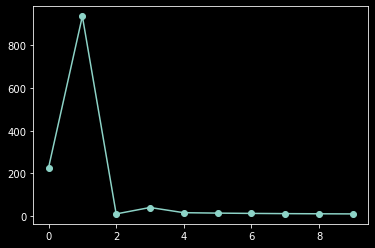

In [20]:
plt.plot(range(epochs),cost_list,marker='o')

In [17]:
cost_list

[tensor(226.6765),
 tensor(936.0161),
 tensor(10.3792),
 tensor(40.4250),
 tensor(16.0951),
 tensor(14.1616),
 tensor(12.7610),
 tensor(11.7435),
 tensor(10.9920),
 tensor(10.4243)]

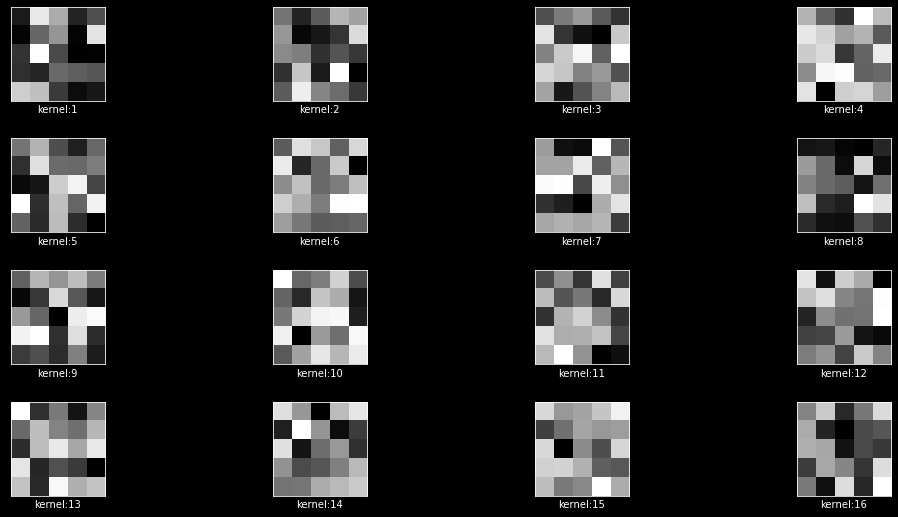

In [21]:
plot_parameters(Model.state_dict()['cnn1.weight'], number_rows=4)

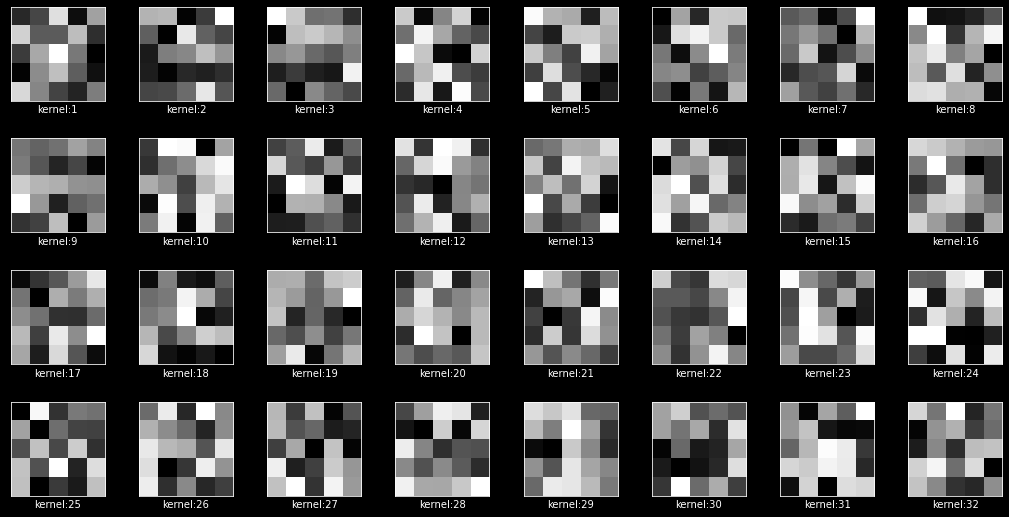

In [22]:
plot_parameters(Model.state_dict()['cnn2.weight'], number_rows=4)

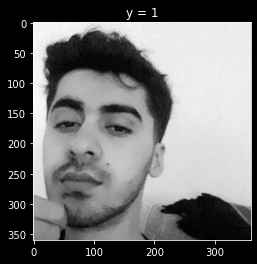

In [30]:
show_data(dataset2[342])

In [38]:
out = Model.activation(dataset2[342][0].view(1, 1, 360, 360))

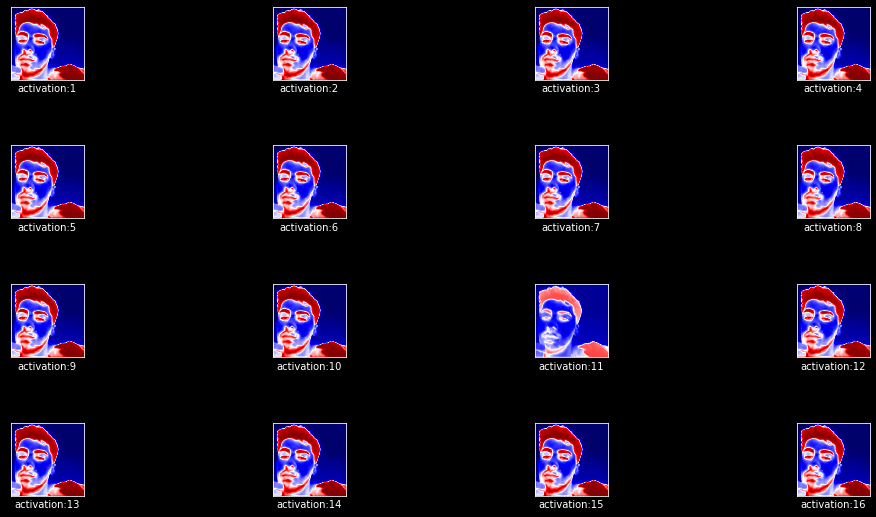

In [48]:
plot_activations(out[0], number_rows=4, name="Output after the 1st CNN")

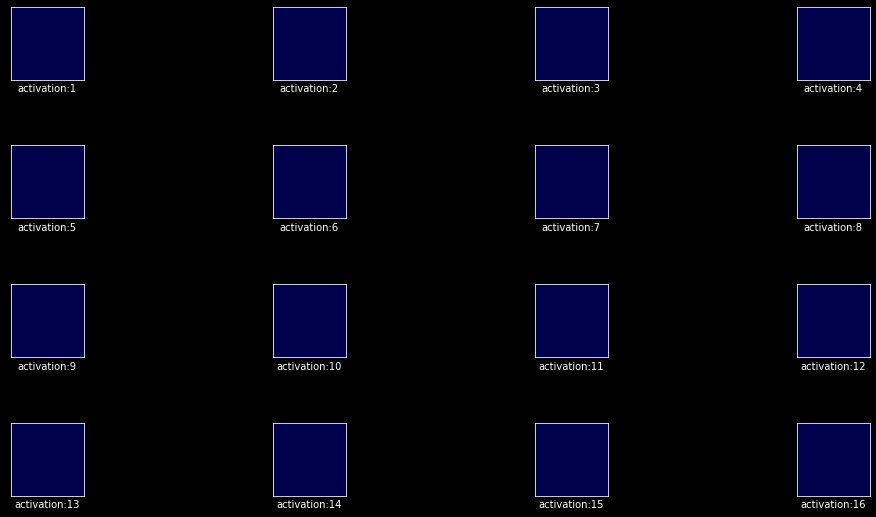

In [49]:
plot_activations(out[1], number_rows=4, name="Output after the 1st Relu")

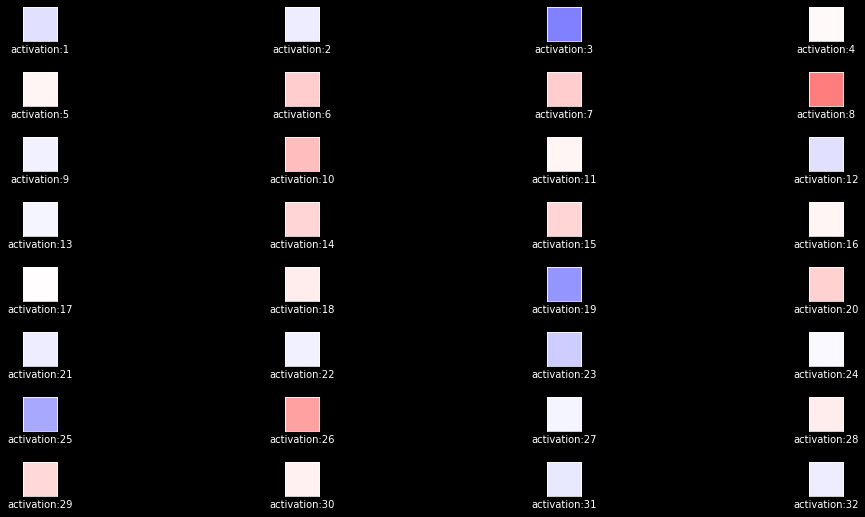

In [50]:
plot_activations(out[2], number_rows=32 // 4, name="Output after the 2nd CNN")

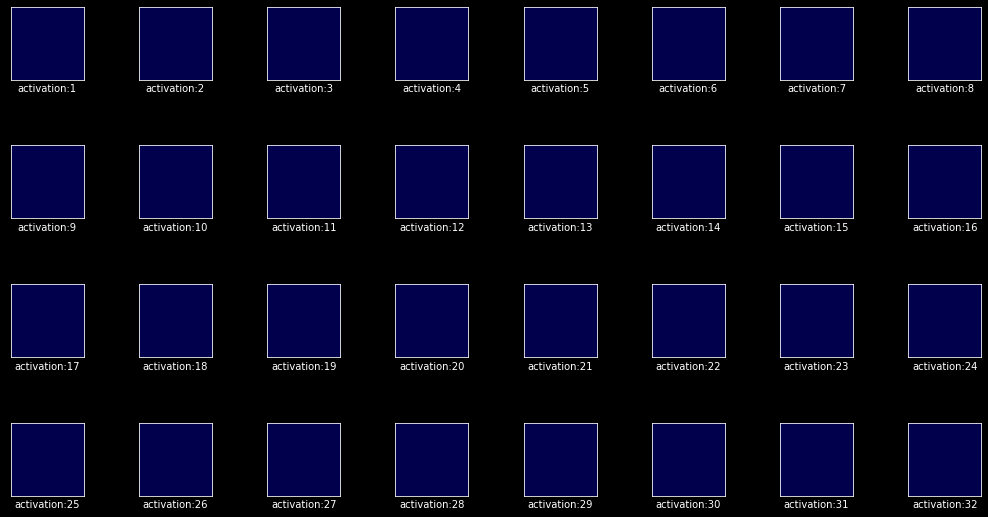

In [47]:
plot_activations(out[3], number_rows=4, name="Output after the 2nd Relu")

In [43]:
out

(tensor([[[[  -0.8309,   -0.7986,   -0.8897,  ...,   -0.8716,   -0.6628,
              -0.4503],
           [  -0.8703,   -0.8660,   -1.0515,  ...,   -1.0303,   -0.8734,
              -0.5677],
           [  -0.9697,   -0.9089,   -1.1763,  ...,   -1.1488,   -0.9497,
              -0.5741],
           ...,
           [  -0.6445,   -0.6125,   -0.7563,  ...,   -0.2964,   -0.2913,
              -0.2774],
           [  -0.5222,   -0.5056,   -0.6675,  ...,   -0.2918,   -0.2881,
              -0.2778],
           [  -0.4662,   -0.4157,   -0.5418,  ...,   -0.2839,   -0.2812,
              -0.2727]],
 
          [[  -2.7888,   -2.9000,   -3.2150,  ...,   -3.1788,   -2.7600,
              -2.5721],
           [  -3.0925,   -3.3663,   -3.7448,  ...,   -3.6967,   -3.2594,
              -2.9425],
           [  -3.2962,   -3.7152,   -4.1824,  ...,   -4.1213,   -3.6321,
              -3.2718],
           ...,
           [  -2.6122,   -2.8431,   -3.0850,  ...,   -1.8872,   -1.8720,
              -1.86

In [77]:
accuracy_list

[0.5128205128205128]